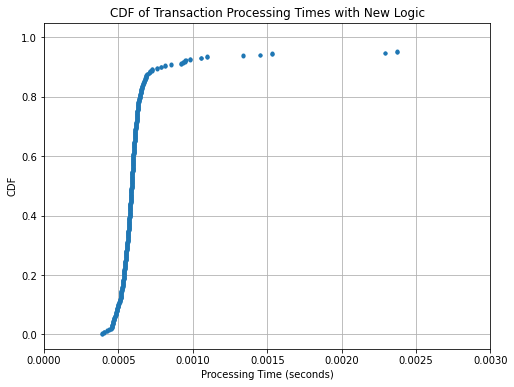

(None,
                                              event_key  \
 0    node1:DEPOSIT o 88:2d42fdaffb5cb25ef42040caa64...   
 1    node1:DEPOSIT q 66:df80aaa424678c4e4b7a99714d5...   
 2    node1:DEPOSIT k 76:2f34d10f989839c9a2cf7aaa714...   
 3    node1:TRANSFER k -> c 46:8983c00508afef54d62fe...   
 4    node1:DEPOSIT k 91:aaea4e9b243985d2d2293a9aed7...   
 ..                                                 ...   
 721  node3:TRANSFER r -> p 2:d0c90234e43c6b9a3e8ff4...   
 722  node2:TRANSFER g -> z 152:3c7a022288072cef9b0d...   
 723  node1:TRANSFER l -> y 18:4c947ce31eb239a1a5f20...   
 724  node2:TRANSFER o -> s 7:84f6180785edcb6ba999f3...   
 725  node2:TRANSFER v -> r 1:680e6e4941ae154e531369...   
 
                      time_created                time_delivered  \
 0   2024-03-04 17:25:03.927679207 2024-03-04 17:25:03.928554372   
 1   2024-03-04 17:25:03.927883337 2024-03-04 17:25:03.928661003   
 2   2024-03-04 17:25:03.927911520 2024-03-04 17:25:03.928759684   
 3   2024-0

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

# Function to read and concatenate log files into a single DataFrame
def read_logs_to_df(log_files_pattern):
    all_files = glob.glob(log_files_pattern)
    list_of_dfs = []
    
    for filename in all_files:
        df = pd.read_csv(filename, header=None, names=["event_key", "time_created", "time_delivered"])
        list_of_dfs.append(df)
    
    # Concatenate all data into one DataFrame
    combined_df = pd.concat(list_of_dfs, axis=0, ignore_index=True)
    
    # Convert time strings to datetime
    combined_df["time_created"] = pd.to_datetime(combined_df["time_created"])
    combined_df["time_delivered"] = pd.to_datetime(combined_df["time_delivered"])
    
    return combined_df

# Use the function to read all log files into a DataFrame
log_files_pattern = '*.log'  # Update this path to where your log files are stored
df = read_logs_to_df(log_files_pattern)

# Creating dicts for latest possible time delivered for each event and time created
latest_time_delivered_dict = df.groupby("event_key")["time_delivered"].max().to_dict()
time_created_dict = df.set_index("event_key")["time_created"].to_dict()

# Calculate processing time using the new logic
df["processing_time"] = df["event_key"].apply(lambda x: (latest_time_delivered_dict[x] - time_created_dict[x]).total_seconds())

# Plotting CDF with new logic
plt.figure(figsize=(8, 6))
processing_times = np.sort(df["processing_time"])
cdf = np.arange(1, len(processing_times) + 1) / len(processing_times)
plt.plot(processing_times, cdf, marker=".", linestyle="none")
plt.title("CDF of Transaction Processing Times with New Logic")
plt.xlabel("Processing Time (seconds)")
plt.ylabel("CDF")

plt.xlim(0, .003)  # Set the x-axis to have a max of 5 seconds

plt.grid(True)
plt.show(), df
